## In-class practice for Lecture 20

* 2-D grid meshing using meshgrid( )
* 2-D contour plots using contour( )
* 2-D color plots using contourf( )
* Simple modeling uisng NumPy and Matplotlib
* Answer each question using Python codes in a separate cell. 

### 1.  Dipole field on Earth's surface

on the earth's surface, the magnitude of ideal dipole field goes like the following equation,

$$B(\lambda) = B_E\sqrt{1+3\sin^2\lambda}$$

where $B_E = 31000$ nT and $\lambda$ is the latitude (ignore dipole tilt here). Now let's use the dipole magnetic field equation to make some plots (Geophysics lab!)

- generate a 1-D NumPy array named _lon_, between -180 and 180 degrees, step by 5 degrees
- generate a 1-D NumPy array named _lat_, between -90 and 90 degrees, step by 5 degrees
- use the _lon_, and _lat_ arrays to generate a 2-D mesh using the X,Y = meshgrid(_lon_, _lat_) function. After calling the meshgrid() function, X is a 2-D NumPy array of longitude (or the longitude of each grid point), Y is a 2-D NumPy array of latitude ($\lambda$)
- calculate the magnitude of the dipole geomagnetic field as a function of X and Y
- use pcolor( ) to plot the magnitude of dipole B field as a function of the 2-D grid (X,Y)
- use contour( ) to plot 30 contours of B magnitude as on the 2-D grid (X,Y)
- use contourf( ) to plot the magnitude of dipole B field on the 2-D grid (X,Y), try to specify the **levels** option in contourf.
- in a **new figure**, generate a global map using the "orthographic" projection
- now visualize the intensity of the dipole magnetic field on top of your map using the contourf( ) function.
- play with the colormap and choose your favorite one

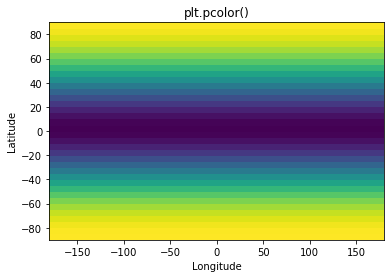

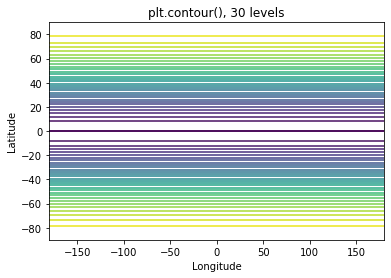

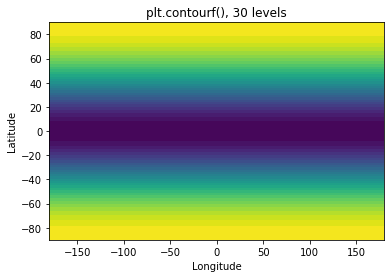

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

lon = np.linspace(-180,180,73) # pay attention to the dimensions
lat = np.linspace(-90,90,37)

X,Y = np.meshgrid(lon,lat)

# plot magnitude of B using pcolor()
BE = 31000
B = BE*np.sqrt(1+3*np.sin(Y*np.pi/180)**2)
plt.pcolor(X,Y,B)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('plt.pcolor()')
plt.show()

# plot magnitude of B using contour()
plt.contour(X,Y,B,levels = 30)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('plt.contour(), 30 levels')
plt.show()

# plot magnitude of B using contourf()
plt.contourf(X,Y,B,levels = 30)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('plt.contourf(), 30 levels')
plt.show()

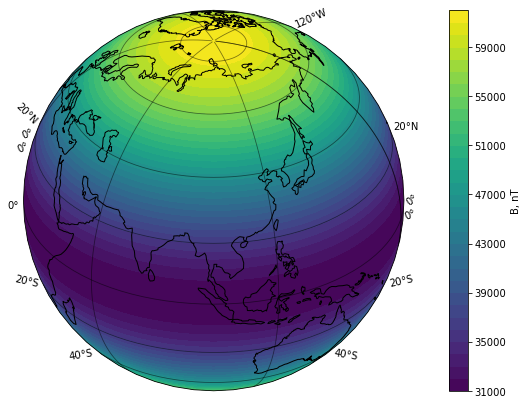

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

fig = plt.figure(figsize=(16,7)) # create a figure with asize of (20,15)
ax = plt.axes(projection = ccrs.Orthographic(central_longitude=100,\
                                             central_latitude=33)) # create a map project of Orthographic
ax.coastlines(resolution='110m') # plot coastlines

# draw 30 filled contours
mesh = ax.contourf(X,Y,B,30,cmap='viridis',transform=ccrs.PlateCarree()) 

ax.gridlines(draw_labels = True, color='black', alpha=0.5) # add grid lines etc
bar = fig.colorbar(mesh) # add colorbar
bar.set_label('B, nT') # add label

### 2. Inclination of the Dipole Magnetic field

In 1600, William Gilbert hypothesized that the Earth itself was a giant bar magnetic and that this gave rise to the Earth's **magnetic field**!  If it were true- that the source of the magnetic field behaved like a giant bar magnet- then the **inclination** of the **magnetic field** would vary as a function of latitude. 

**Inclination** is the angle between the horizontal and the direction of the field. If the field were generated by a bar magnet, then the **inclination** would be horizontal (0 $^\circ$) at the magnetic equator and vertical ($\pm 90 ^\circ$) at the North and South poles. The equation that relates **inclination** ($I$) and latitude ($\lambda$) is:

$$ \tan I = 2 \tan \lambda \quad \quad(dipole\  equation)$$        

- Calculate the inclination at every latitude using the dipole equation:

    -  write a function (regular or lambda function) that calculates inclination $I$ (use the dipole equation) as a function of $\lambda$ [**Hint:** Remember that **np.tan( )**  and **np.arctan( )** work in radians and your plot should be in degrees.]   

    -  use the 2-D grid (X,Y) you've generated in Prob. 1, apply the function you wrote to the (X, Y) grid and compute the inclination for all the grid points
    - use the "robinson" projection to generate a global map 
    - make a 2-D color plot of the idealized dipole inclination $I$ on top of your map projection
    - add a colorbar to your figure
    - which colormap is more appropriate for the inclination angle plot?

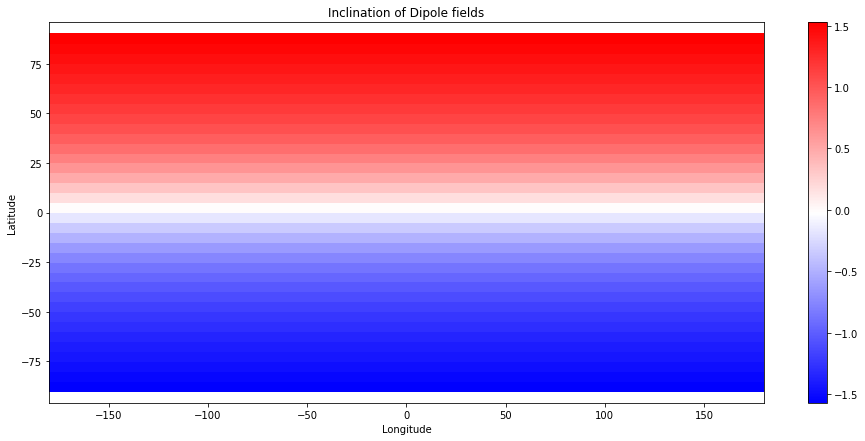

In [6]:
fig = plt.figure(figsize=(16,7)) # create a figure with asize of (20,15)
Incli = np.arctan(2*np.tan(Y*np.pi/180))
plt.pcolor(X,Y,Incli,cmap='bwr')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Inclination of Dipole fields')
plt.axis('equal')
plt.show()

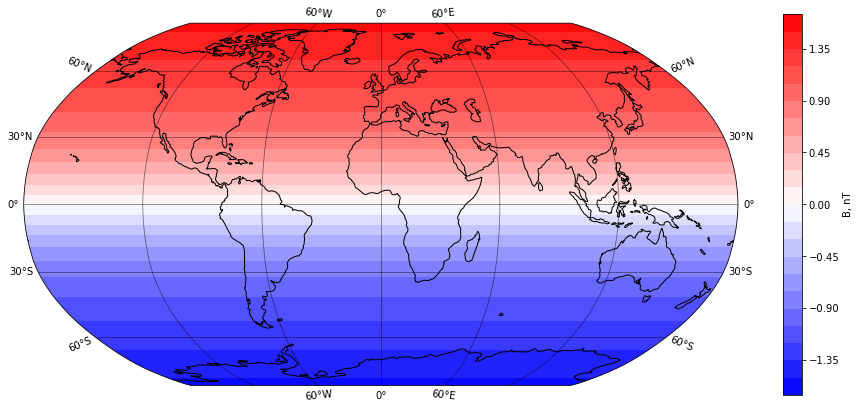

In [13]:
fig = plt.figure(figsize=(16,7)) # create a figure with asize of (20,15)
ax = plt.axes(projection = ccrs.Robinson()) # create a map project of Orthographic
ax.coastlines(resolution='110m') # plot coastlines

# draw 30 filled contours
mesh = ax.contourf(X,Y,Incli,30,cmap='bwr',transform=ccrs.PlateCarree()) 

ax.gridlines(draw_labels = True, color='k', alpha=0.5) # add grid lines etc
bar = fig.colorbar(mesh) # add colorbar

bar.set_label('B, nT') # add label